<a href="https://colab.research.google.com/github/Chahinezehallaci/Chahinezehallaci/blob/main/chatbot_Yoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
# Il faut aussi charger l'image de Yoda

     |████████████████████████████████| 3.8 MB 4.5 MB/s 
     |████████████████████████████████| 596 kB 44.6 MB/s 
     |████████████████████████████████| 6.5 MB 43.0 MB/s 
     |████████████████████████████████| 895 kB 59.7 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread('sample.jpeg')
# imgplot = plt.imshow(img)
# plt.show()

In [ ]:
model_name = "microsoft/DialoGPT-large"
# model_name = "microsoft/DialoGPT-medium"
# model_name = "microsoft/DialoGPT-small"
tokenizertest = AutoTokenizer.from_pretrained(model_name)
modeltest = AutoModelForCausalLM.from_pretrained(model_name)
img = mpimg.imread('/content/baby-yoda-hi.gif')

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Yoda: Do you have any questions?
>> You:Which is your name
Yoda: I'm the one on the left
Yoda: Any other questions?
>> You:what is your real name?
Yoda: Aurora, nice to meet you
Yoda: Any other questions?
>> You:How old are you ?
Yoda: In my mid twenties
Yoda: Any other questions?
>> You:what's your work ?
Yoda: I will be hired as an IT manager
Yoda: Any other questions?
>> You:What's your salary ?
Yoda: It's a bit hard to say, I'm a student.
Yoda: Any other questions?
>> You:no
Yoda: Good bye!


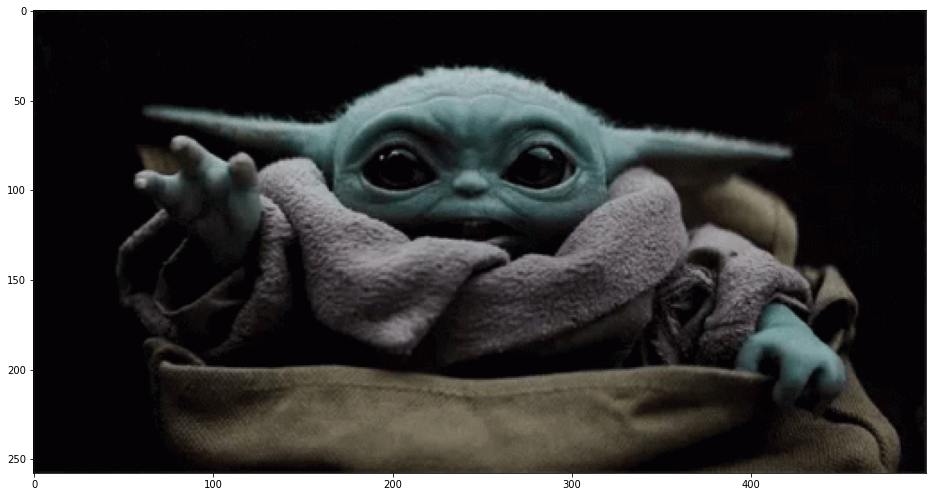

In [ ]:
# chatting 5 times with Top K sampling & tweaking temperature
for step in range(10):
  if step==0:
    print("Yoda: Do you have any questions?")
  else: 
    print("Yoda: Any other questions?")
  # take user input
  text = input(">> You:")
  if text =='no':
    print("Yoda: Good bye!")
    plt.subplots(figsize=(16,9))
    plt.imshow(img)
    break
  # encode the input and add end of string token
  input_ids = tokenizertest.encode(text + tokenizertest.eos_token, return_tensors="pt")
  # concatenate new user input with chat history (if there is)
  bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
  # generate a bot response
  chat_history_ids = modeltest.generate(
      bot_input_ids,
      max_length=1000,
      do_sample=True,
      top_k=100,
      temperature=0.75,
      pad_token_id=tokenizertest.eos_token_id
      )
  #print the output
  output = tokenizertest.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
  print(f"Yoda: {output}")
  if step==9: print("We reached the limit of our session, Good bye!"), plt.subplots(figsize=(16,9)), plt.imshow(img);